**THE SPARKS FOUNDATION**

**NAME - KARAN CHOPRA**

**BATCH - JUNE 2022**

AIM - PREDICT THE PERCENTAGE OF THE STUDENT BASED ON THE NUMBER OF STUDY HOURS

IDE - GOOGLE COLAB

**1. IMPORTING THE DATA SET**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#reading data as url
data = pd.read_csv("http://bit.ly/w-data")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [38]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**2. VISUALIZING THE DATASET**

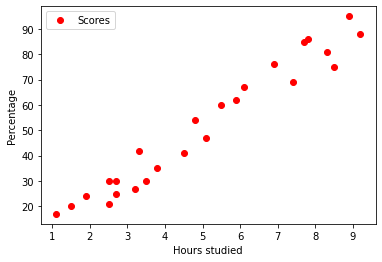

In [40]:
#plotting of data on a 2D graph
data.plot(x='Hours',y='Scores', style='ro')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.show()



```
We can clearly see that as the number of hours studied increase, the percentage also increases. Hence there is a positive linear relation.
```



**3. PREPARING THE DATA**

In [41]:
#Put values of hours in X and value of scores in Y

X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [42]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [43]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [44]:
#We split the data into train and test datasets using train_test_split()

from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)                                                  

In [45]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [46]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [47]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [48]:
Y_test

array([20, 27, 69, 30, 62])

**4. TRAIN THE ALGORITHM**

In [49]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Done.")

Done.


**5. VISUALIZE THE MODEL**

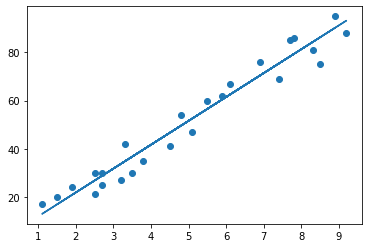

In [50]:
#plot the regression line
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

**6. PREDICTION**

In [51]:
print(X_test)
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [52]:
#Comparing actual vs predicted

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
#Testing with custom data

time_in_hrs = 9.25
pred = regressor.predict([[time_in_hrs]])
print(f"No of Hours = {time_in_hrs}")
print(f"Predicted Score = {pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737539


**7. EVALUATION OF MODEL**

In [54]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
